# Welch's_t-test
$$
\begin{align}
A_1 &= \{19.8, 20.4, 19.6, 17.8, 18.5, 18.9, 18.3, 18.9, 19.5, 22.0\}
\\
A_2 &= \{28.2, 26.6, 20.1, 23.3, 25.2, 22.1, 17.7, 27.6, 20.6, 13.7, 23.2, 17.5, 20.6, 18.0, 23.9, 21.6, 24.3, 20.4, 24.0, 13.2\}
\end{align}
$$

There is a significant difference between A1 and A2? 

# Hypothesis
* $H_0$ : No significant difference
* $H_A$ : Significant difference

If there is a significant difference, we reject the null hypothesis $H_0$

# see also
* wikipedia: https://en.wikipedia.org/wiki/Welch's_t-test
* python library: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Compute Test statistic and p-value using scipy

In [1]:
import scipy.stats as stats

a1 = [19.8, 20.4, 19.6, 17.8, 18.5, 18.9, 18.3, 18.9, 19.5, 22.0]
a2 = [28.2, 26.6, 20.1, 23.3, 25.2, 22.1, 17.7, 27.6, 20.6, 13.7, 23.2, 17.5, 20.6, 18.0, 23.9, 21.6, 24.3, 20.4, 24.0, 13.2]


result = stats.ttest_ind(a1, a2, equal_var=False, alternative='two-sided')
result

Ttest_indResult(statistic=-2.2192409158236233, pvalue=0.03597227102979685)

In [2]:
# Test result
alpha = 0.05
if result.pvalue < alpha:
    print("null hypothesis is rejected (significant difference)")
else:
    print("null hypothesis is not rejected (not significant difference)")

null hypothesis is rejected (significant difference)


# compute the same test statistic and pvalue using numpy
## Biased Variance
$$\Large
\begin{eqnarray*}
V(X_1) = \frac{1}{N_1} \sum_{k=1}^{N_1} (X_{1,k} - \overline{X_1})^2\\
V(X_2) = \frac{1}{N_2} \sum_{k=1}^{N_2} (X_{2,k} - \overline{X_2})^2\\
\end{eqnarray*}
$$

where $\overline{X_j}$ is a sample mean 

## Unbiased variance
$$
\Large
\begin{eqnarray*}
s_1^2 = \frac{1}{N_1-1} \sum_{k=1}^{N_1} (X_{1,k} - \overline{X_1})^2 = \frac{N_1}{N_1-1} V(X_1)\\
s_2^2 = \frac{1}{N_2-1} \sum_{k=1}^{N_2} (X_{2,k} - \overline{X_2})^2  = \frac{N_2}{N_2-1} V(X_2)\\
\end{eqnarray*}
$$

where $\Large s_i$ are corrected sample standard deviations.
* see: https://en.wikipedia.org/wiki/Standard_deviation#Corrected_sample_standard_deviation

## test statistic t
$$\Large
t = \frac{\Delta\overline{X}}{s_{\Delta\bar{X}}} = \frac{\overline{X}_1 - \overline{X}_2}{\sqrt{ {s_{\bar{X}_1}^2} + {s_{\bar{X}_2}^2} }} = \frac{\overline{X}_1 - \overline{X}_2}{\sqrt{ {s_1^2 \over N_1}  + {s_2^2 \over N_2}  }}
$$

where 
$$\Large
s_{\bar{X}_i} = {s_i \over \sqrt{N_i}} 
$$

are standard errors of $X_i$ 

## degree of freedom
$$\Large
\nu \quad  \approx \quad
 \frac{\left( \; \frac{s_1^2}{N_1} \; + \; \frac{s_2^2}{N_2} \; \right)^2 }
 { \quad \frac{s_1^4}{N_1^2 \nu_1} \; + \; \frac{s_2^4}{N_2^2 \nu_2 } \quad }.
 $$

In [3]:
import numpy as np

a1 = np.array(a1)
a2 = np.array(a2)

mean1 = a1.mean()
mean2 = a2.mean()
mean1, mean2

(19.369999999999997, 21.589999999999996)

In [4]:
n1 = len(a1)
n2 = len(a2)

# unbiased variance
unbiased_var1 = a1.var()* n1/(n1-1)
unbiased_var2 = a2.var() * n2/(n2-1)
unbiased_var1, unbiased_var2

(1.4489999999999996, 17.11568421052632)

In [5]:
# standard error
se1 = np.sqrt(unbiased_var1/n1)
se2 = np.sqrt(unbiased_var2/n2) 

In [6]:
test_statistic = (mean1 - mean2)/np.sqrt(se1**2 + se2**2)
test_statistic # same

-2.2192409158236233

In [7]:
# compute degrees of freedom
nu1 = n1 -1
nu2 = n2 -1
df = (se1**2 + se2**2)**2/((se1**4)/nu1 + (se2**4)/nu2 )
df

24.49622312420124

In [8]:
# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(test_statistic), df))
p_value # same

0.03597227102979672

In [9]:
# Test result
alpha = 0.05
if p_value < alpha:
    print("null hypothesis is rejected (significant difference)")
else:
    print("null hypothesis is not rejected (not significant difference)")

null hypothesis is rejected (significant difference)


# Plot the PDF of t-distribution and test statistic


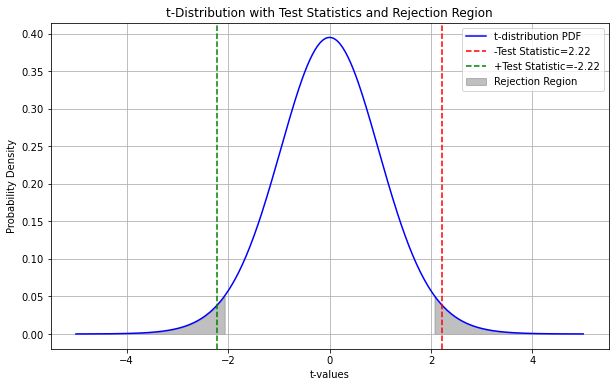

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the degrees of freedom
df = 24.49622312420124

# Define the test statistic
test_statistic = -2.2192409158236233

# Define the significance level (alpha)
alpha = 0.05

# Generate values for the x-axis (t-values)
x = np.linspace(-5, 5, 400)
y = stats.t.pdf(x, df)

# Create the t-distribution plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='t-distribution PDF', color='blue')

# Plot the test statistic
ax.axvline(x=-test_statistic, color='red', linestyle='--', label=f'-Test Statistic={-test_statistic:.2f}')
ax.axvline(x=test_statistic, color='green', linestyle='--', label=f'+Test Statistic={test_statistic:.2f}')

# Highlight the rejection region
a = abs(stats.t.ppf(alpha / 2, df))
ax.fill_between(x, 0, y, where=(x <=-a) , color='gray', alpha=0.5, label='Rejection Region')
ax.fill_between(x, 0, y, where=(x >=a), color='gray', alpha=0.5)

# Add labels and legend
ax.set_xlabel('t-values')
ax.set_ylabel('Probability Density')
ax.set_title('t-Distribution with Test Statistics and Rejection Region')
ax.legend()

# Show the plot
ax.grid(True)
plt.show()

# result
print()